#  IRIS FLOWER CLASSIFICATION

The Iris flower data set or Fisher’s Iris data set is one of the most famous multivariate data set used for testing various Machine Learning Algorithms.Iris flower has three species namely setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

**Given the measurements of Sepal Width, Sepal length, Petal length and Petal width of all three categories.. We have to classify them based on their measurements.

# Steps

   **1. Importing requried libraries                                                                                            
     2. Loading of dataset                                                                                                       
     3. Display Summary Statistics                                                                                              
     4. Data Visualization                                                                                                      
         4.1 Histograms(Uniariate analysis)                                                                                     
         4.2 Scatter plots to visualize relation between variables(bivariate analysis)                                              
         4.3 Pair plots(Multivariate analysis)                                                                                  
         4.4 Correlation matrix                                                                                                    
     5. Data Modelling                                                                                                                 
         5.1 Train-Test-Split                                                                                                     
         5.2 Decision Tree classification(ID3 Classifier)                                                                          
         5.3 Confusion matrix                                                                                                    
         5.4 Model and accuracy sore                                                                                             
     6. Prediction of species

**Importing requried libraries

In [26]:
#import requried libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset

In [2]:
#loading dataset
df = pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Display first 8 and last 6 rows of dataset
print("First eight rows of dataset are: ")
print(df.head(8))
print("\n")
print("Last six rows of dataset are: ")
print(df.tail(6))

First eight rows of dataset are: 
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa


Last six rows of dataset are: 
     sepal_length  sepal_width  petal_length  petal_width         species
144           6.7          3.3           5.7          2.5  Iris-virginica
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.

In [4]:
#Summary statistics of Iris dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#To get no. of rows and columns in the dataset
print("Dimensions of dataset are: ",df.shape)

Dimensions of dataset are:  (150, 5)


In [7]:
#To get category of each type of species
print("No.of flowers in each species",df.value_counts("species"))

No.of flowers in each species species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Data Visualization

We will use Matplotlib and Seaborn library for the data visualization.

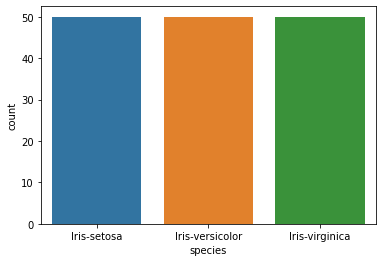

In [8]:
#We will construct a count plot to see the count of each species
sns.countplot(x='species', data=df)
plt.show()

Text(0, 0.5, 'frequency')

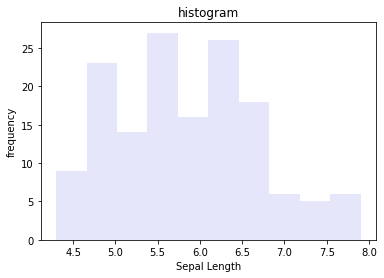

In [9]:
plt.hist(df['sepal_length'],color='lavender')
plt.title("histogram")
plt.xlabel("Sepal Length")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

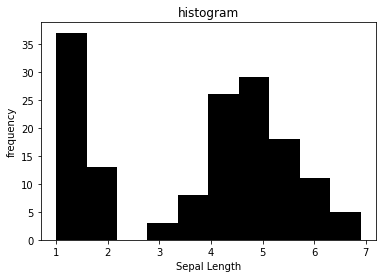

In [10]:
plt.hist(df['petal_length'],color = 'black')
plt.title("histogram")
plt.xlabel("Sepal Length")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

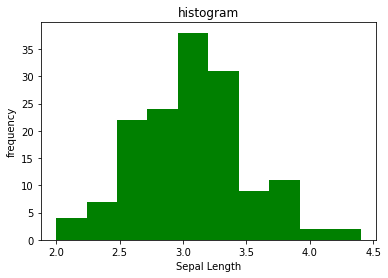

In [11]:
plt.hist(df['sepal_width'],color='green')
plt.title("histogram")
plt.xlabel("Sepal Length")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

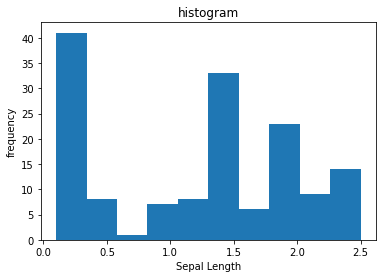

In [12]:
plt.hist(df['petal_width'])
plt.title("histogram")
plt.xlabel("Sepal Length")
plt.ylabel("frequency")

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

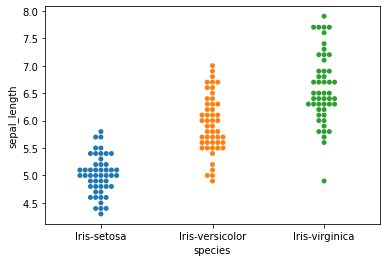

In [13]:
sns.swarmplot(x='species',y='sepal_length',data=df)

# Relation between variables(attributes)

**We will see the relationship between the sepal length and sepal width and also between petal length and petal width. We shall construct various plots between different attributes of measurement to know about the relationship between them.

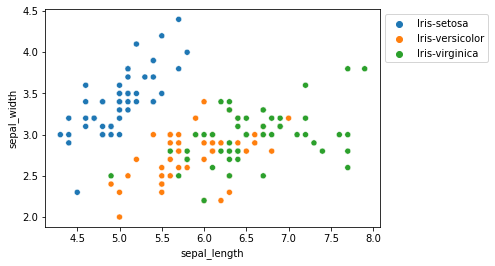

In [14]:
#We will see the plot between sepallength and sepal width by plotting a Scatter plot between them.
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
#To display the plot
plt.show()

**From the above plot we can draw the following conclusions:                                                                              
    1. The species "Iris- Setosa" have larger sepal_width but smaller sepal_length when compared.                                
    2. The species "Iris-versicolor" have smaller sepal_width and sepal_length when compared to other two and lies between.      
    3. The species "Iris-virginica" have larger sepal_length but smaller sepal_width when compared.
    

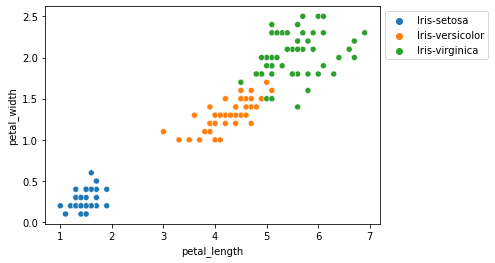

In [15]:
#We will see the plot between petal length and petal width by plotting a Scatter plot between them.
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
#To display the plot
plt.show()

**From the above plot we can draw some conclusions like:                                                                        
    1. The species "Iris-setosa" has smaller petal_width and petal length when compared.                                         
    2. The species "Iris-versicolor" have measurements middle of setosa and versicolor.                                          
    3. The species "Iris-virginica" have larger petal length and petal width when compared.

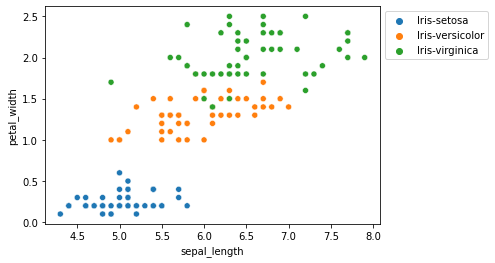

In [16]:
#We will see the plot between sepallength and petal width by plotting a Scatter plot between them.
sns.scatterplot(x='sepal_length', y='petal_width', hue='species', data=df, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
#To display the plot
plt.show()

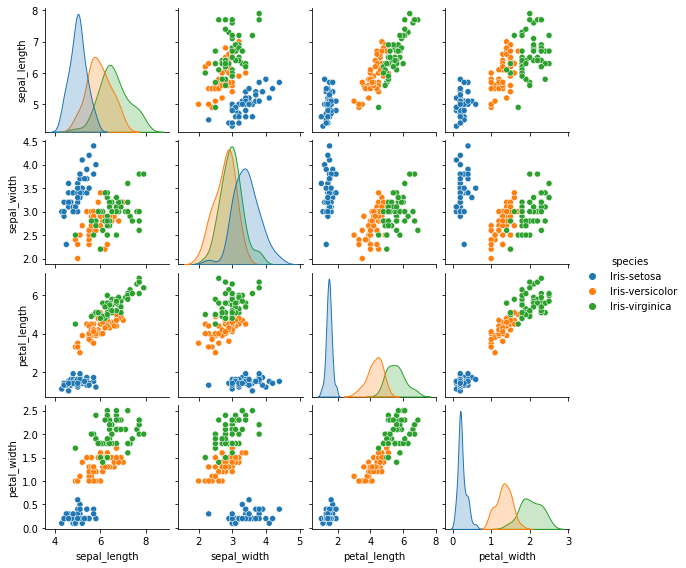

In [17]:
#Multivariate analysis
#Pairplot which shows the pair-wise relation between every attributes
sns.pairplot(df,hue='species', height=2)

In [ ]:
df.corr()

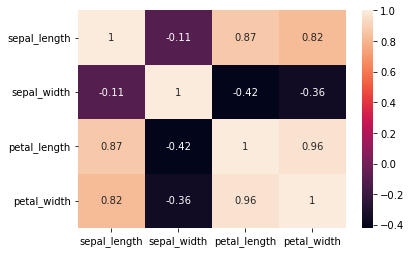

In [19]:
# Visualizing the correlation between the columns using heatmap.
sns.heatmap(df.corr(), annot = True)
plt.show()

# Data Modelling

Train-Test Split of data for evalutaing the performance of the machine learning algorithm.For splitting of dataset for training and testing we import train_test_split from sklearn.model_selection library.

In [20]:
from sklearn.model_selection import train_test_split
x = df.drop(columns = ['species'])
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4)
y_test

79     Iris-versicolor
59     Iris-versicolor
24         Iris-setosa
30         Iris-setosa
117     Iris-virginica
123     Iris-virginica
136     Iris-virginica
53     Iris-versicolor
100     Iris-virginica
63     Iris-versicolor
116     Iris-virginica
45         Iris-setosa
25         Iris-setosa
16         Iris-setosa
77     Iris-versicolor
86     Iris-versicolor
73     Iris-versicolor
4          Iris-setosa
106     Iris-virginica
140     Iris-virginica
88     Iris-versicolor
125     Iris-virginica
89     Iris-versicolor
84     Iris-versicolor
1          Iris-setosa
147     Iris-virginica
5          Iris-setosa
109     Iris-virginica
81     Iris-versicolor
10         Iris-setosa
127     Iris-virginica
23         Iris-setosa
9          Iris-setosa
101     Iris-virginica
102     Iris-virginica
107     Iris-virginica
91     Iris-versicolor
43         Iris-setosa
17         Iris-setosa
36         Iris-setosa
19         Iris-setosa
110     Iris-virginica
82     Iris-versicolor
6          

# Decision Tree : ID3 decision tree classifier

ID3 stands for Iterative Dichotomiser 3 and is named such because the algorithm iteratively (repeatedly) dichotomizes(divides) features into two or more groups at each step. ID3 tree is mainly used for classification problems with nominal features only.

In [21]:
#Importing library foe decision classifier
from sklearn.tree import DecisionTreeClassifier
id3=DecisionTreeClassifier(criterion='entropy')
#Fit the data
k=id3.fit(x_train,y_train)
#predict the data
y_pred=id3.predict(x_test)
print(y_pred)

['Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica']


# Confusion Matrix
**The confusion matrix is a matrix used to determine the performance of the classification models for a given set of test data. It can only be determined if the true values for test data are known. The matrix itself can be easily understood, but the related terminologies may be confusing. Since it shows the errors in the model performance in the form of a matrix, hence also known as an error matrix. 

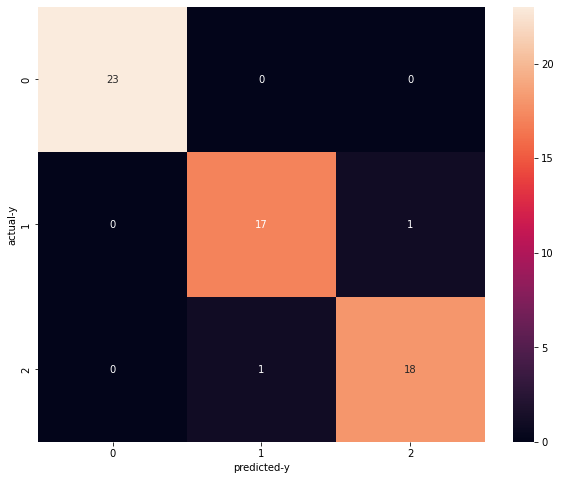

In [22]:
#Confusion matrix 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()

Model accuracy score represents the model’s ability to correctly predict both the positives and negatives out of all the predictions. Mathematically, it represents the ratio of sum of true positive and true negatives out of all the predictions. **Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)

Accuracy score is calculated between predicted output value and test value Model score is calculated between output and input values of testing.

In [23]:
#Accuracy score and model score
print(classification_report(y_pred,y_test))
print('accuracy-score',accuracy_score(y_pred,y_test))
print('Model score',id3.score(x_test,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.95      0.95      0.95        19

       accuracy                           0.97        60
      macro avg       0.96      0.96      0.96        60
   weighted avg       0.97      0.97      0.97        60

accuracy-score 0.9666666666666667
Model score 0.9666666666666667


**Prediction of species

Here we can classify the three types of species of Iris flowers.

In [25]:
X_new = np.array([[3, 2, 1, 0.2], [4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.9]])
#Prediction of the species
prediction = id3.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


C:\Users\meghana\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
